In [55]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
from highlight_text import ax_text, fig_text
import pandas as pd

from PIL import Image
import urllib
import os

In [56]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system


In [57]:
league_id = '8'
fotmob_id = '47'
response = requests.get(f'https://dataviz.theanalyst.com/football-season-metrics/{league_id}-2023-team-stats.json')
data = response.json()
league = 'Premier League'

In [58]:
df = pd.DataFrame(data)

In [59]:
pd.set_option('display.max_columns', None)
df = df[['team_name','team_np_xG','team_sp_xG','goals_for_op','goals_for_sp']]

In [60]:
df['xg_share'] = df['team_sp_xG'] / df['team_np_xG']
df['goal_share'] = df['goals_for_sp'] / (df['goals_for_op'] + df['goals_for_sp'])

In [61]:
df.sort_values(by='goal_share', ascending=False, inplace=True)

In [62]:
df['team_name'] = df['team_name'].replace({'West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Manchester Utd', 'Brighton and Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd'})

In [63]:
def plot_battery_chart(data, team_id, ax, legend = False):
    '''
    This function plots the share of xG and goals that were created
    from set-pieces and corners in the MLS.

    Args:
        data (DataFrame): the pandas DataFrame with the data.
        team_id (int): the Fotmob team id.
        ax (object): the matplotlib axes in which to draw the plot.
    '''

    goal_share = data[data["team_id"] == team_id]["goal_share"].iloc[0]
    xg_share = data[data["team_id"] == team_id]["xg_share"].iloc[0]

    # Hatch parameters
    plt.rcParams['hatch.linewidth'] = 0.75
    plt.rcParams['hatch.color'] = "lightgrey"

    # Goal share

    if legend:
        goal_text = f"{goal_share:.1%} goals"
        xg_text = f"{xg_share:.1%} of xG"
    else:
        goal_text = f"{goal_share:.1%}"
        xg_text = f"{xg_share:.1%}"      

    height = .1

    ax.barh([1], [1], height = height, facecolor = "none", ec = "black", zorder = 3)
    ax.barh([1], [goal_share], height = height, color = "#74959A")
    ax.barh([1], [1 - goal_share], height = height, left = goal_share, facecolor = "none", hatch = "////////")
    ax.annotate(
        xy = (goal_share, 1),
        xytext = (20, 0),
        textcoords = "offset points",
        text = goal_text,
        ha = "center",
        va = "center",
        size = 5,
        weight = "bold",
        fontproperties = regular,
        color = "#74959A"
    )

    ax.barh([.85], [1], height = height, facecolor = "none", ec = "black", zorder = 3)
    ax.barh([.85], [xg_share], height = height, color = "#495371")
    ax.barh([.85], [1 - xg_share], height = height, left = xg_share, facecolor = "none", hatch = "////////")
    ax.annotate(
        xy = (xg_share, .85),
        xytext = (20, 0),
        textcoords = "offset points",
        text = xg_text,
        ha = "center",
        va = "center",
        size = 5,
        weight = "bold",
        fontproperties = regular,
        color = "#495371"
    )

    ax.set_axis_off()



In [64]:
todays_date = pd.to_datetime('today').date()

In [65]:
df.reset_index(drop=True, inplace=True)

In [67]:
team_ids = pd.read_csv(f"C:\\Users\\George\\Documents\\Football Analytics\\fotmob_{league}_data.csv")

In [68]:
team_ids['team_name'] = team_ids['team_name'].replace({'Milton Keynes Dons':'MK Dons','AFC Bournemouth':'Bournemouth','West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Manchester Utd', 'Brighton and Hove Albion':'Brighton','Brighton & Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd', 'Tottenham Hotspur': 'Tottenham'})

In [69]:
team_ids.drop_duplicates(subset=['team_name'], keep='first', inplace=True)
team_ids = team_ids[['team_name','team_id']]

In [ ]:
if league == 'League Two':
    new_row = ['Colchester United', 8416]
    new_roww = ['Swindon Town', 9795]
    team_ids.loc[len(team_ids)] = new_row
    team_ids.loc[len(team_ids)] = new_roww

In [70]:
df['team_id'] = 0
for x in range(len(df)):
    team_name = df['team_name'][x]
    df['team_id'][x] = team_ids[team_ids['team_name'] == team_name]['team_id'].values[0]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_19044\510948281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_id'][x] = team_ids[team_ids['team_name'] == team_name]['team_id'].values[0]
C:\Users\dmsta\AppData\Local\Temp\ipykernel_19044\510948281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_id'][x] = team_ids[team_ids['team_name'] == team_name]['team_id'].values[0]
C:\Users\dmsta\AppData\Local\Temp\ipykernel_19044\510948281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

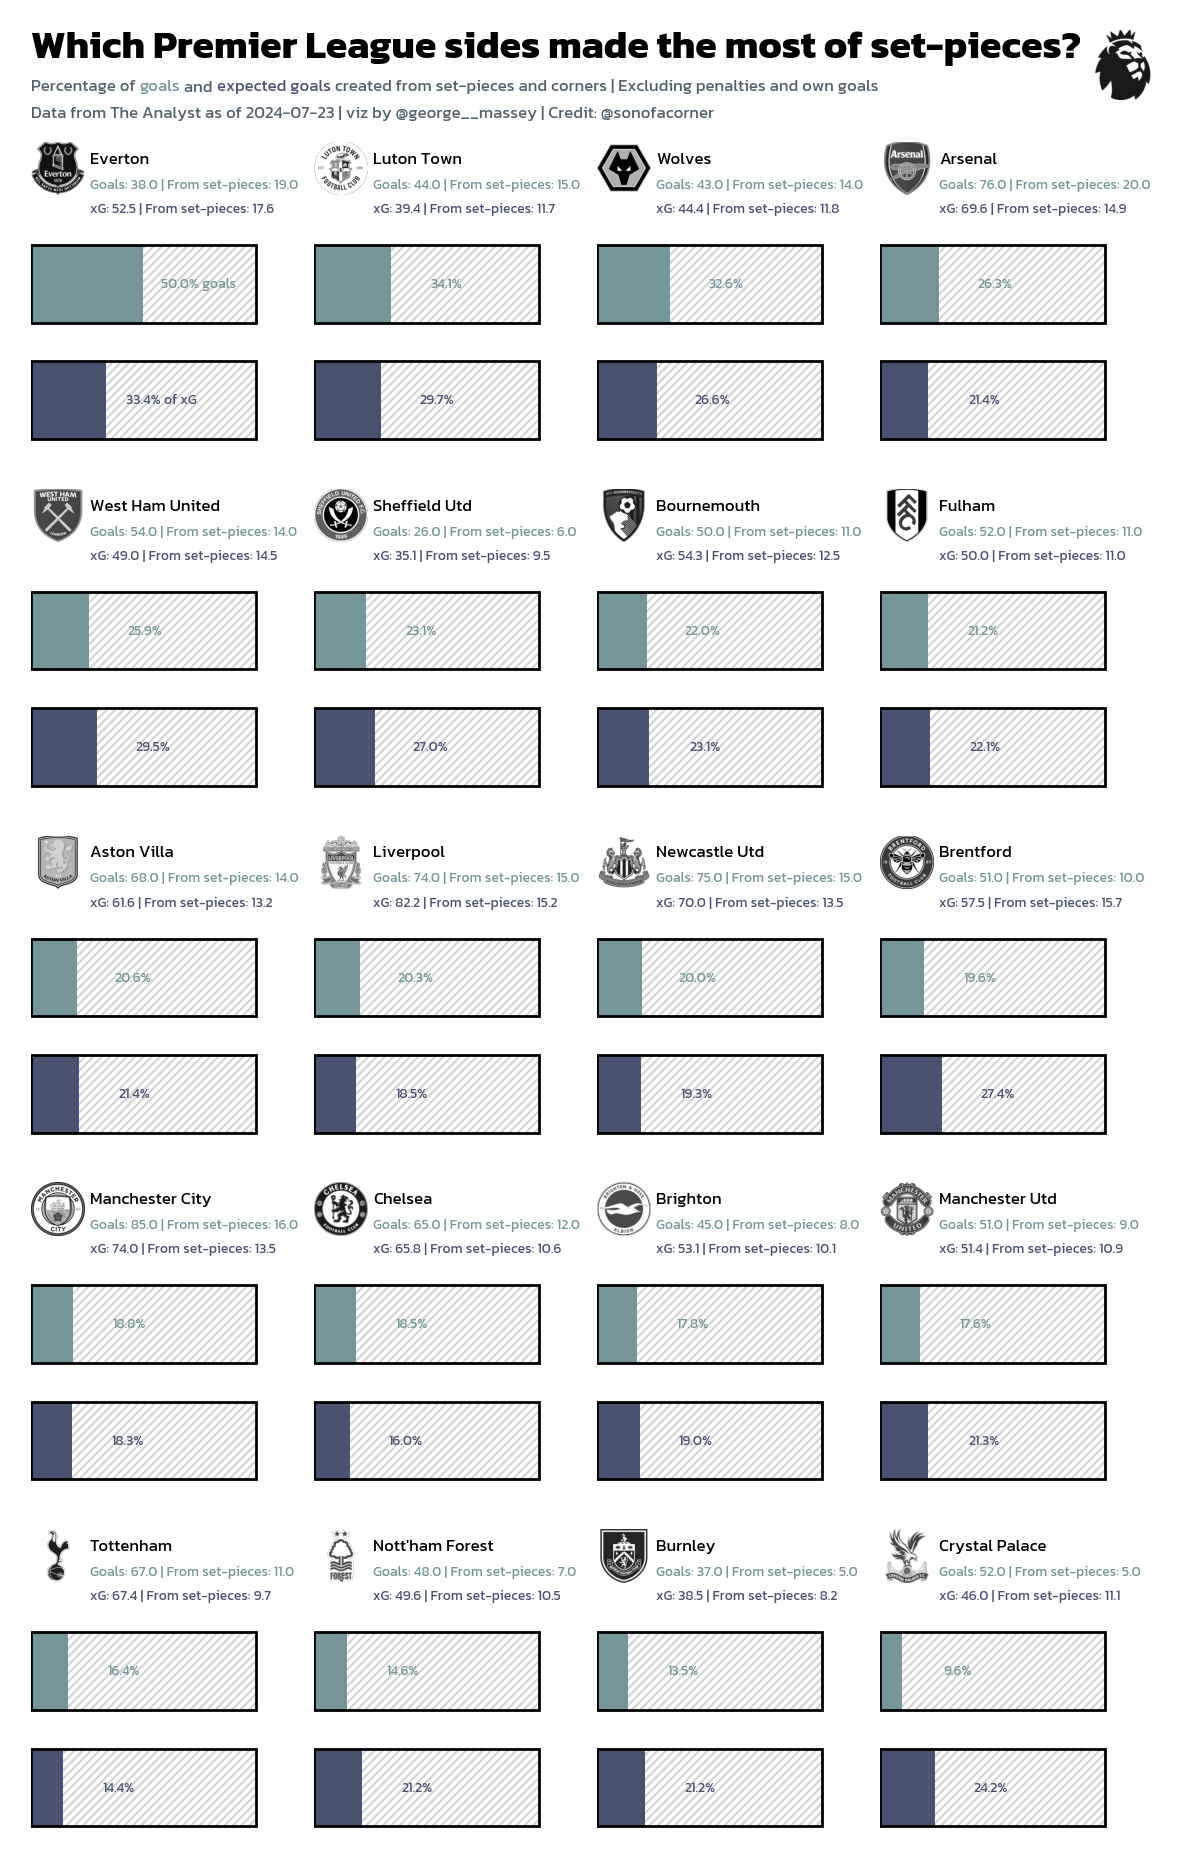

In [73]:
fig = plt.figure(figsize=(7, 11), dpi = 200)
nrows = 10
ncols = 4
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios = [(1/nrows)*2. if x % 2 != 0 else (1/nrows)/2. for x in range(nrows)], hspace = 0.3
)

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )

            if row == 1 and col == 0:
                legend = True
            else:
                legend = False
            
            plot_battery_chart(data = df, team_id=df["team_id"].iloc[plot_counter], ax = ax, legend = legend)            

            plot_counter += 1
        
        else:
            team_id = df["team_id"].iloc[logo_counter]
            team_name = df["team_name"].iloc[logo_counter]
            goal_set_pieces = df[df["team_id"] == team_id]["goals_for_sp"].iloc[0]
            xg_set_pieces = df[df["team_id"] == team_id]["team_sp_xG"].iloc[0]
            goals_for = df[df["team_id"] == team_id]["goals_for_op"].iloc[0] + df[df["team_id"] == team_id]["goals_for_sp"].iloc[0]
            xg_for = df[df["team_id"] == team_id]["team_np_xG"].iloc[0]


            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = "NW", facecolor = "#EFE9E6"
            )
            club_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/teamlogo/{team_id:.0f}.png")).convert("LA")
            logo_ax.imshow(club_icon)
            logo_ax.axis("off")
 # Add the team name
            ax_text(
                x = 1.1, 
                y = 0.81,
                s = f"{team_name}",
                ax = logo_ax, 
                weight = "bold", 
                fontproperties = regular, 
                ha = "left", 
                size = 6, 
                annotationbbox_kw = {"xycoords":"axes fraction"}
            )

            # Add the subtitles for each side
            ax_text(
                x = 1.1,
                y = 0.32,
                s = f"<Goals: {goals_for} | From set-pieces: {goal_set_pieces}>\n<xG: {xg_for:.1f} | From set-pieces: {xg_set_pieces:.1f}>",
                highlight_textprops=[
                    {"color":"#74959A"},
                    {"color":"#495371"}
                ],
                ax = logo_ax, 
                weight = "normal", 
                fontproperties = regular, 
                ha = "left", 
                size = 5, 
                annotationbbox_kw = {"xycoords":"axes fraction"}
            )

            logo_counter += 1


fig_text(
    x = 0.125, y = .915, 
    s = f"Which {league} sides made the most of set-pieces?",
    va = "bottom", ha = "left",
    fontsize = 14, color = "black", fontproperties = bold
)
fig_text(
	x = 0.125, y = .89, 
    s = f"Percentage of <goals> and <expected goals> created from set-pieces and corners | Excluding penalties and own goals\nData from The Analyst as of {todays_date} | viz by @george__massey | Credit: @sonofacorner",
    highlight_textprops=[
        {"color":"#74959A", "weight":"bold"},
        {"color":"#495371", "weight":"bold"}
    ],
	va = "bottom", ha = "left",
	fontsize = 6, color = "#4E616C", fontproperties = regular
)

# # ---- The League's logo
league_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/{fotmob_id}.png")).convert("LA")
league_ax = fig.add_axes([0.88, 0.89, 0.05, 0.05], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

plt.savefig(
	f"C:\\Users\\George\\Documents\\Football Analytics\\Visuals\\{league} Set Piece Perc Sonofacorner.png",
	dpi = 500,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)